In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 252s 22us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

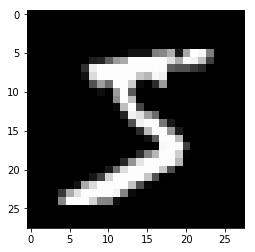

In [8]:
plt.imshow(single_image,cmap="gray")

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from keras.utils.np_utils import to_categorical

In [12]:
y_cat_test = to_categorical(y_test,10)          # 10 is numbers of classes

In [15]:
y_cat_train = to_categorical(y_train,10)        # 2 --> 0,0,1,0,0,0,0,0,0,0

In [16]:
y_cat_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
single_image.max()

255

In [19]:
x_train = x_train/x_train.max()  #convert range(0,255) to (0,1)

In [20]:
x_test = x_test/x_test.max()

In [21]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

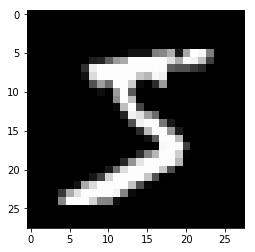

In [23]:
plt.imshow(x_train[0],cmap="gray")

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train = x_train.reshape(60000,28,28,1)

In [26]:
x_test = x_test.reshape(10000,28,28,1)

In [27]:
x_test.shape

(10000, 28, 28, 1)

In [28]:
from keras.models import Sequential

In [29]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 43s 716us/step - loss: 0.1364 - acc: 0.9593
Epoch 2/2
60000/60000 [==============================] - 43s 718us/step - loss: 0.0487 - acc: 0.9857


In [36]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 155us/step


[0.04240119712236337, 0.9862]

In [37]:
from sklearn.metrics import classification_report

In [38]:
predictions = model.predict_classes(x_test)

In [40]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.97      0.99      0.98       982
          5       0.99      0.99      0.99       892
          6       0.98      0.99      0.98       958
          7       0.99      0.98      0.98      1028
          8       0.99      0.97      0.98       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [84]:
import cv2
img = cv2.imread("num.jpg",0)

In [85]:
img = cv2.resize(img,(28,28))

In [86]:
img.shape


(28, 28)

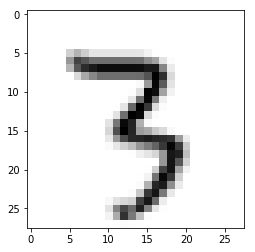

In [87]:

plt.imshow(img,cmap="gray")
import numpy as np
img = img.reshape(28,28,1)

In [88]:
img = img[np.newaxis,:,:,:]/img.max()

In [89]:
img

array([[[[1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         

In [90]:
print(model.predict_classes(img))

[3]
